# Perancangan Tapis FIR dengan Metode Jendela

#### DHIA SALSABILA AZHAR
#### 18/430187/PA/18700

Link audio

https://drive.google.com/file/d/1I8UczYOwxCw_31JwzrVl64TiW-lcIsE3/view?usp=sharing

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fft,ifft

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def idealLPF(M,wc):
  hn = np.zeros(2*M+1)
  for n in range(-M,M+1):
    if n==0:
      hn[n+M] = wc/np.pi
    else:
      hn[n+M] = np.sin(wc*n)/(np.pi*n)
  return hn

In [ ]:
def HPF(M,wc):
  hn = np.zeros(2*M+1)
  for n in range(-M,M+1):
    if n==0:
      hn[n+M] = (np.pi-wc)/np.pi
    else:
      hn[n+M] = -(np.sin(wc*n)/(np.pi*n))
  return hn

In [ ]:
def BPF(M,wh,wl):
  hn = np.zeros(2*M+1)
  for n in range(-M,M+1):
    if n==0:
      hn[n+M] = (wh-wl)/np.pi
    else:
      hn[n+M] = (np.sin(wh*n)/(np.pi*n))-(np.sin(wl*n)/(np.pi*n))
  return hn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

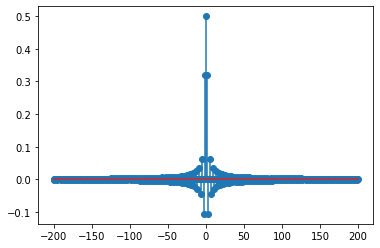

In [ ]:
M1=200
hdlpf = idealLPF(M1,np.pi/2)
plt.stem(np.arange(-M1,M1+1),hdlpf)

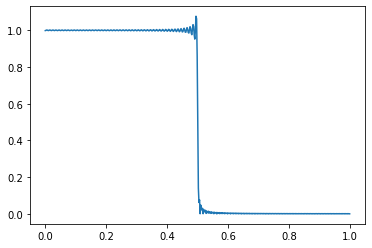

In [ ]:
w,Hdlpf = signal.freqz(hdlpf,1,512)
plt.plot(w/np.pi,abs(Hdlpf))

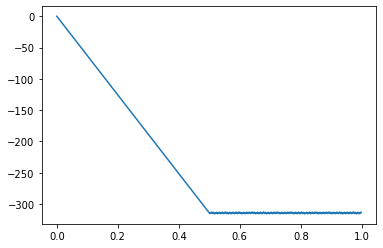

In [ ]:
plt.plot(w/np.pi,np.unwrap(np.angle(Hdlpf)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

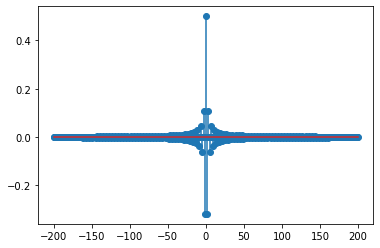

In [ ]:
M1=200
hdhpf = HPF(M1,np.pi/2)
plt.stem(np.arange(-M1,M1+1),hdhpf)

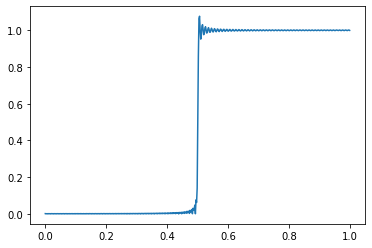

In [ ]:
w,Hdhpf = signal.freqz(hdhpf,1,512)
plt.plot(w/np.pi,abs(Hdhpf))

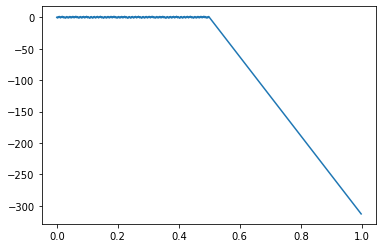

In [ ]:
plt.plot(w/np.pi,np.unwrap(np.angle(Hdhpf)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

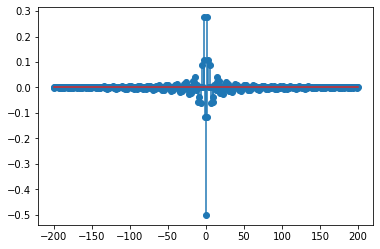

In [ ]:
M1=200
hdbpf = BPF(M1,np.pi/6,2*np.pi/3)
plt.stem(np.arange(-M1,M1+1),hdbpf)

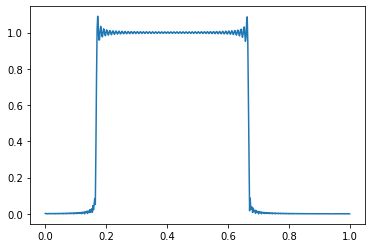

In [ ]:
w,Hdbpf = signal.freqz(hdbpf,1,512)
plt.plot(w/np.pi,abs(Hdbpf))

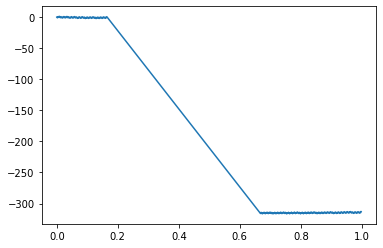

In [ ]:
plt.plot(w/np.pi,np.unwrap(np.angle(Hdbpf)))

In [ ]:
import IPython.display as ipd
from scipy.io import wavfile

In [ ]:
namafile = 'PinkPanther30.wav'
fs,x = wavfile.read(namafile)

In [ ]:
x.shape

(661500,)

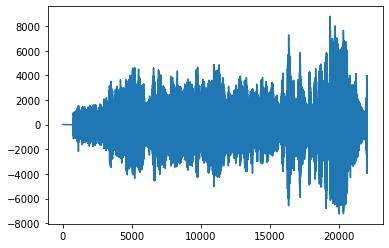

In [ ]:
t = np.arange(len(x))/len(x)*fs
plt.plot(t,x)
ipd.Audio(x,rate=fs)

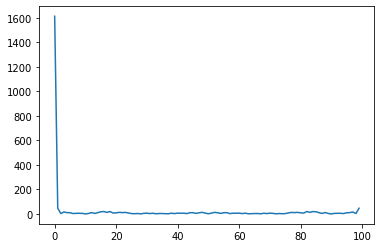

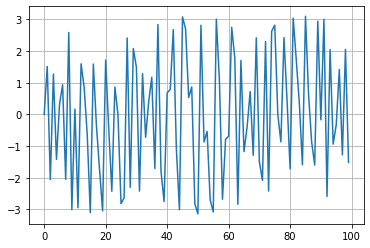

In [ ]:
Xw = fft(x[0:100])
plt.plot(abs(Xw))
plt.figure()
plt.plot(np.angle((Xw)))
plt.grid()

In [ ]:
whamm = signal.get_window(Nx=31,window='hamming')

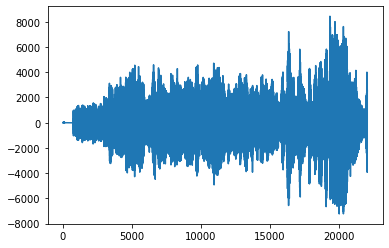

In [ ]:
hdlpf = idealLPF(M=15,wc=np.pi/2)
hblpf = whamm*hdlpf
yblpf = signal.lfilter(hblpf,1,x)
plt.plot(t,yblpf)
ipd.Audio(yblpf,rate=fs)

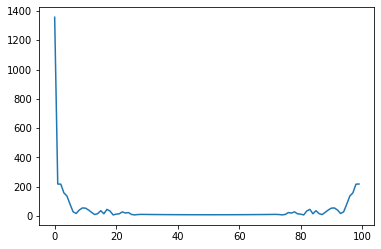

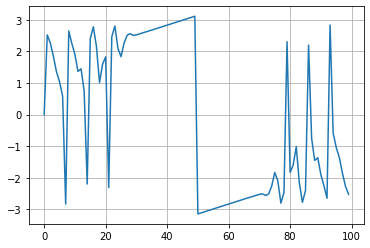

In [ ]:
Xwlpf = fft(yblpf[0:100])
plt.plot(abs(Xwlpf))
plt.figure()
plt.plot(np.angle((Xwlpf)))
plt.grid()

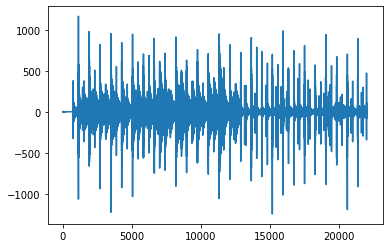

In [ ]:
hdhpf = HPF(M=15,wc=np.pi/2)
hbhpf = whamm*hdhpf
ybhpf = signal.lfilter(hbhpf,1,x)
plt.plot(t,ybhpf)
ipd.Audio(ybhpf,rate=fs)

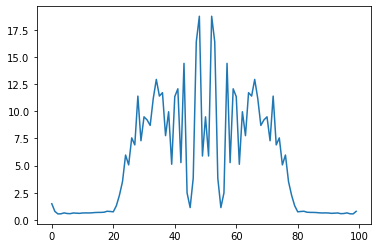

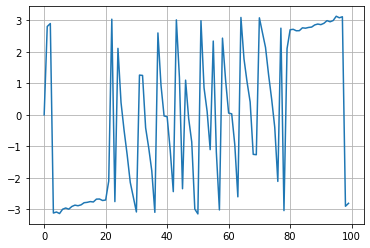

In [ ]:
Xwhpf = fft(ybhpf[0:100])
plt.plot(abs(Xwhpf))
plt.figure()
plt.plot(np.angle((Xwhpf)))
plt.grid()

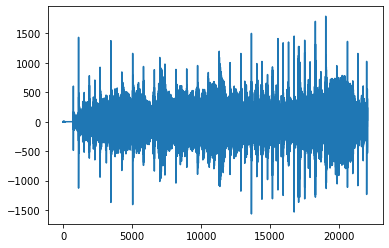

In [ ]:
hdbpf = BPF(M=15,wh=np.pi/6,wl=2*np.pi/3)
hbbpf = whamm*hdbpf
ybbpf = signal.lfilter(hbbpf,1,x)
plt.plot(t,ybbpf)
ipd.Audio(ybbpf,rate=fs)

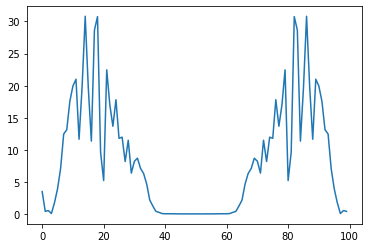

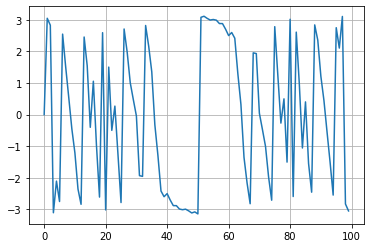

In [ ]:
Xwbpf = fft(ybbpf[0:100])
plt.plot(abs(Xwbpf))
plt.figure()
plt.plot(np.angle((Xwbpf)))
plt.grid()

#### Hal-hal menarik dalam eksperimen ini diantaranya
1. Pada saat di lakukan filter dengan low pass filter, terdapat beberapa suara yang hilang, tetapi suara jadi lebih enak di dengar. Hal ini dikarenakan frekuensi tinggi di filter sehingga suara yang terdengar hanya yang memiliki frekuensi rendah saja.
2. Pada saat dilakukan filter dengan high pass filter suara terdengar lebih bising dan terdapat beberapa suara yang tidak terdengar, hal ini terjadi karena frekuensi rendah di filter sehingga suara yang terdengar hanya yang memiliki frekuensi tinggi
3. Pada saat dilakukan filter dengan band pass filter terdengar denging ketika perubahan nada terlebih ketika suara berada pada filter low pass kemudian berpindah ke filter high pass suara denging terdengar lebih keras.
4. Dari percobaan filter yang dilakukan suara yang dihasilkan menjadi lebih menarik dan memiliki perbedaan dari suara yang tidak difilter dan juga suara yang di filter terdengar lebih bising dan mendenging dibandingkan yang tidak difilter. 
